# Model de Machine Learning

In [1]:
    # Imports essentiels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

# Configuration d'affichage
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# Répertoires
ROOT = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()
DATA_DIR = ROOT / 'data'
OUTPUT_DIR = ROOT / 'output'
OUTPUT_DIR.mkdir(exist_ok=True)

print(f"Workspace : {ROOT}")
print(f"Data directory : {DATA_DIR}")


Workspace : c:\Users\romai\Documents\ESILV - Année 2025-2026\Hackaton\hackaton_finance_team2
Data directory : c:\Users\romai\Documents\ESILV - Année 2025-2026\Hackaton\hackaton_finance_team2\data


In [4]:
tx_processed = pd.read_csv(OUTPUT_DIR / "processed_data.csv")
print(f"Taille du dataset : {tx_processed.shape}")
print(tx_processed.head())




Taille du dataset : (251622, 11)
   has_zip  amount_parsed  merchant_city_encoded  mcc_encoded  is_night  \
0        1      -0.374405                    169           78         0   
1        1       0.195082                   1248           71         0   
2        1      -0.390768                   2555           56         0   
3        1       0.535361                   4278           56         0   
4        1      -0.361017                   1534           37         0   

   use_chip_encoded  merchant_id_encoded  hour  merchant_state_encoded  \
0                 0                 1653     9                      62   
1                 0                13360    17                      36   
2                 0                 5575    12                      11   
3                 0                 8047     8                      78   
4                 0                11018    14                      25   

   has_error  is_fraud  
0          0         0  
1          0         

In [6]:
# Définir X et y
feature_cols = [col for col in tx_processed.columns if col != 'is_fraud']
X = tx_processed[feature_cols]
y = tx_processed['is_fraud']

print("Features utilisées :", feature_cols)
print(f"Nombre d'observations : {len(X)}")


Features utilisées : ['has_zip', 'amount_parsed', 'merchant_city_encoded', 'mcc_encoded', 'is_night', 'use_chip_encoded', 'merchant_id_encoded', 'hour', 'merchant_state_encoded', 'has_error']
Nombre d'observations : 251622


In [7]:
# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train : {X_train.shape}, Test : {X_test.shape}")


Train : (201297, 10), Test : (50325, 10)


### Entraînement du modèle (Random Forest)

🌳 Random Forest — Évaluation :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41938
           1       1.00      1.00      1.00      8387

    accuracy                           1.00     50325
   macro avg       1.00      1.00      1.00     50325
weighted avg       1.00      1.00      1.00     50325

AUC : 0.9998


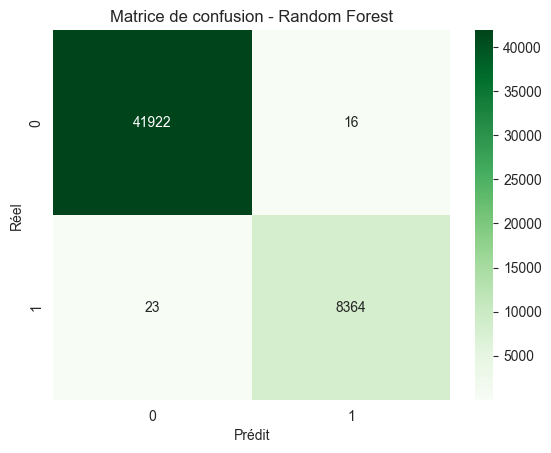

C:\Users\romai\AppData\Local\Temp\ipykernel_14424\3432328707.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='viridis')


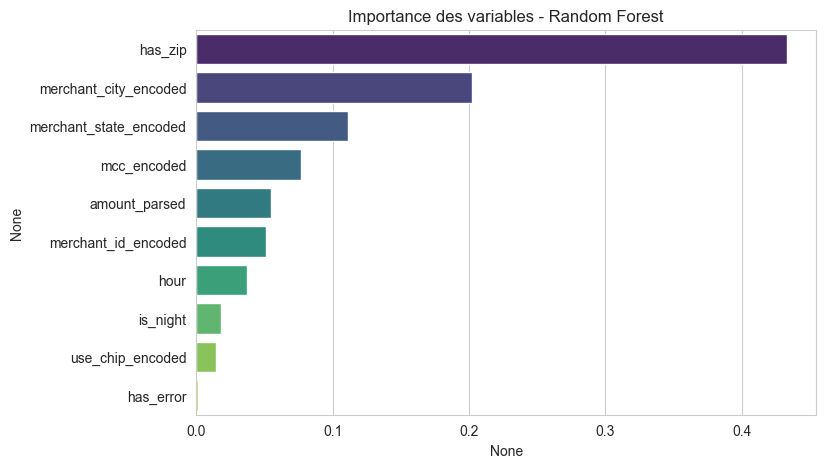

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("🌳 Random Forest — Évaluation :\n")
print(classification_report(y_test, y_pred_rf))
print(f"AUC : {roc_auc_score(y_test, y_proba_rf):.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# Importance des variables
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title("Importance des variables - Random Forest")
plt.show()


### Régression Logistic

C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📊 Régression Logistique — Évaluation :

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     41938
           1       0.66      0.99      0.79      8387

    accuracy                           0.91     50325
   macro avg       0.83      0.94      0.87     50325
weighted avg       0.94      0.91      0.92     50325

AUC : 0.9822


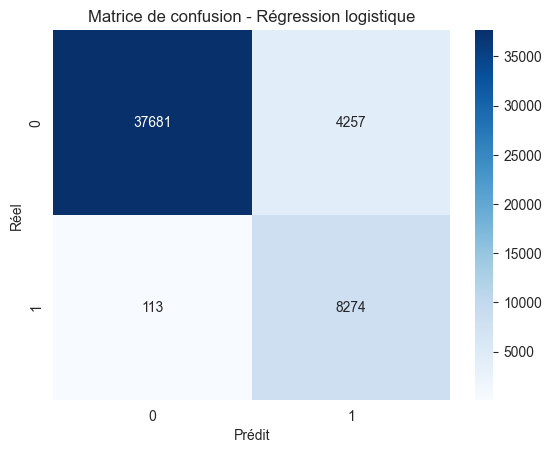

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

print("📊 Régression Logistique — Évaluation :\n")
print(classification_report(y_test, y_pred_lr))
print(f"AUC : {roc_auc_score(y_test, y_proba_lr):.4f}")

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Régression logistique")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


### XGBoost

🚀 XGBoost — Évaluation :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41938
           1       1.00      1.00      1.00      8387

    accuracy                           1.00     50325
   macro avg       1.00      1.00      1.00     50325
weighted avg       1.00      1.00      1.00     50325

AUC : 0.9999


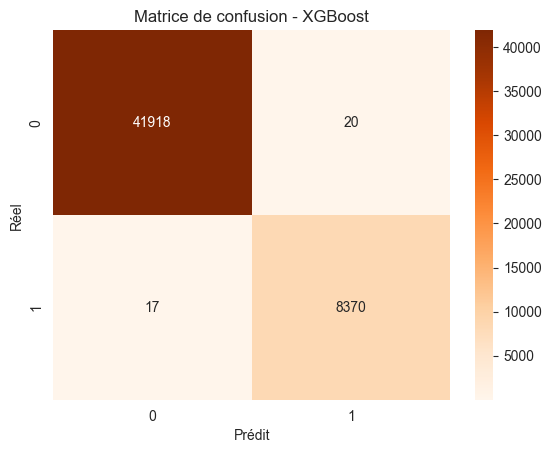

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=1
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("🚀 XGBoost — Évaluation :\n")
print(classification_report(y_test, y_pred_xgb))
print(f"AUC : {roc_auc_score(y_test, y_proba_xgb):.4f}")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("Matrice de confusion - XGBoost")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


### Comparaison entre modèles

📈 Résumé comparatif des modèles :


,Accuracy,Precision,Recall,F1-score,AUC
Model,,,,,
Logistic Regression,0.913164,0.660282,0.986527,0.791089,0.982182
Random Forest,0.999225,0.998091,0.997258,0.997674,0.999755
XGBoost,0.999265,0.997616,0.997973,0.997795,0.999912


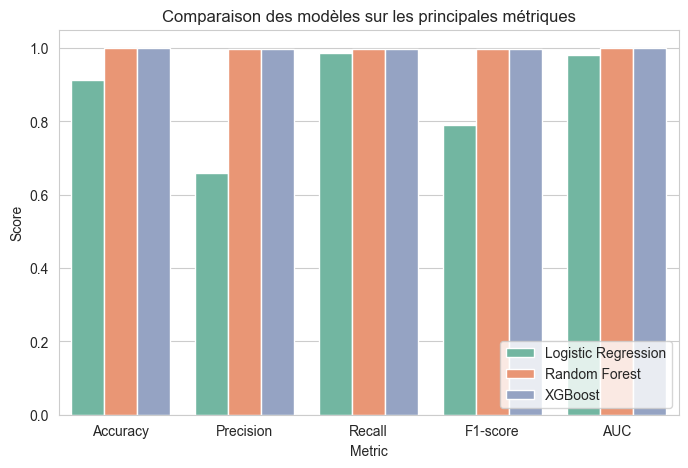

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "AUC": [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_xgb)
    ]
})

print("📈 Résumé comparatif des modèles :")
display(results.set_index("Model"))

# Visualisation
plt.figure(figsize=(8,5))
sns.barplot(data=results.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Metric', y='Score', hue='Model', palette='Set2')
plt.title("Comparaison des modèles sur les principales métriques")
plt.legend(loc='lower right')
plt.show()


On a décidé de garder XGBoost comme modèle final, car c’est celui qui obtient les meilleures performances globales sur l’ensemble des métriques (Accuracy, Recall, F1-score et AUC).
Il gère bien les données déséquilibrées et capte efficacement les relations non linéaires, ce qui en fait le modèle le plus performant et le plus fiable pour la détection de fraude.

## Conclusion

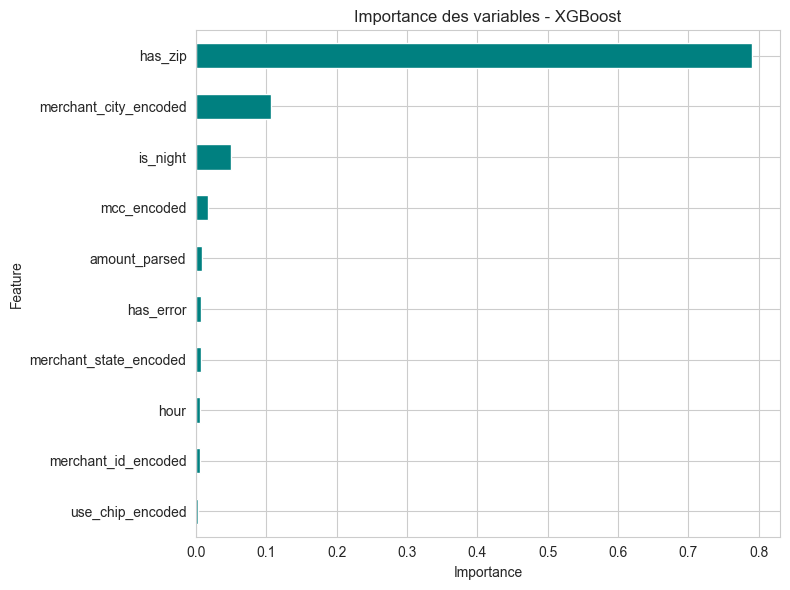

In [15]:
# Importance des features selon XGBoost
importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.plot(kind='barh', color='teal')
plt.title("Importance des variables - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [17]:
import joblib
import os

# Création du dossier 'models' si nécessaire
os.makedirs(OUTPUT_DIR/"models", exist_ok=True)

# Sauvegarde du modèle XGBoost
joblib.dump(xgb, OUTPUT_DIR/"models/xgboost_fraud_model.pkl")

print("✅ Modèle XGBoost sauvegardé sous : output/models/xgboost_fraud_model.pkl")


✅ Modèle XGBoost sauvegardé sous : output/models/xgboost_fraud_model.pkl


In [19]:
# Pour réutiliser le modèle plus tard :
xgb_loaded = joblib.load(OUTPUT_DIR/"models/xgboost_fraud_model.pkl")

# Test rapide
sample_pred = xgb_loaded.predict(X_test[:5])
print("Prédiction du modèle chargé :", sample_pred)


Prédiction du modèle chargé : [0 0 0 1 0]
